In [ ]:
#import general libraries
import pandas as pd
import numpy as np
#import library for hyperparameters optimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
#import fuction for general ml process
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn import preprocessing, svm, metrics, utils
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sn
#import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/data/Prepared_data.csv", sep=',')
df.head()

,No,Date,Ticker,Category,Value,Timestamp,Close,Returns
0,1,38028.0,CWT,Utilities,0.934181,1.076454e+09,14.720000,start
1,2,38028.0,BLL,Process Industries,0.922862,1.076454e+09,8.095000,start
2,3,38028.0,APA,Energy Minerals,0.912117,1.076454e+09,39.830002,start
3,4,38028.0,MATX,Transportation,0.866946,1.076454e+09,16.394106,start
4,5,38028.0,ROST,Retail Trade,0.864789,1.076454e+09,7.712500,start


Returns t=0 removal

In [ ]:
df = df[df.Returns != 'start']
df = df[df.Returns != 'Start']

In [ ]:
df.isnull().sum(axis = 0)

No             0
Date         218
Ticker       218
Category     218
Value        218
Timestamp    218
Close        218
Returns      218
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum(axis = 0)

No           0
Date         0
Ticker       0
Category     0
Value        0
Timestamp    0
Close        0
Returns      0
dtype: int64

In [ ]:
df.dtypes

No            object
Date         float64
Ticker        object
Category      object
Value        float64
Timestamp    float64
Close        float64
Returns       object
dtype: object

In [ ]:
df["Returns"] = pd.to_numeric(df["Returns"], downcast="float")

In [ ]:
df.dtypes

No            object
Date         float64
Ticker        object
Category      object
Value        float64
Timestamp    float64
Close        float64
Returns      float32
dtype: object

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Date,Value,Timestamp,Close,Returns
Date,1.00,-0.16,1.00,0.02,0.04
Value,-0.16,1.00,-0.16,0.05,-0.01
Timestamp,1.00,-0.16,1.00,0.02,0.04
Close,0.02,0.05,0.02,1.00,-0.00
Returns,0.04,-0.01,0.04,-0.00,1.00


In [ ]:
y = df["Returns"].values
y_lin = y.copy()

XLogReg = df.filter(['Value', 'Timestamp'], axis=1)
XLogReg.head()
x_lin = XLogReg.copy()

In [ ]:
y

array([-0.00067959, -0.01024382,  0.00450894, ...,  0.05525851,
        0.45016032,  0.03485853], dtype=float32)

In [ ]:
#XLogReg_train, XLogReg_test, yLogReg_train, yLogReg_test = train_test_split(XLogReg, y, test_size=0.3, random_state=42)
#logReg = LogisticRegression()
#logReg.fit(XLogReg_train, yLogReg_train)
#continuous error

ValueError: ignored

In [ ]:
x = np.mean(y)
for i in range(len(y)):
  if y[i]<x:
    y[i] = 0
  else:
    y[i] = 1
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [ ]:
XLogReg

,Value,Timestamp
36,0.934870,1.077664e+09
37,0.921895,1.077664e+09
38,0.907334,1.077664e+09
39,0.890755,1.077664e+09
40,0.868216,1.077664e+09
...,...,...
26420,0.709506,1.644361e+09
26421,0.701507,1.644361e+09
26422,0.701123,1.644361e+09
26423,0.697954,1.644361e+09


In [ ]:
[np.sum(y), len(y) - np.sum(y)]

[9851.0, 15650.0]

In [ ]:
XLogReg_train, XLogReg_test, yLogReg_train, yLogReg_test = train_test_split(XLogReg, y, test_size=0.3, random_state=42)
logReg = LogisticRegression()
logReg.fit(XLogReg_train, yLogReg_train)

LogisticRegression()

In [ ]:
yLogReg_pred = logReg.predict(XLogReg_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(XLogReg_test, yLogReg_test)))

Accuracy of logistic regression classifier on test set: 0.61


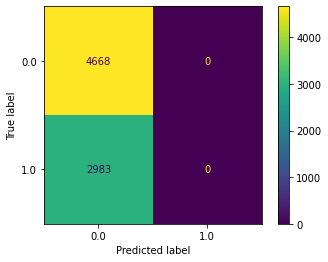

In [ ]:
from sklearn.metrics import confusion_matrix # musi zostać, usunięcie powoduje, że czyta jakąś inną bibliotekę chyba
confusion_matrix = confusion_matrix(yLogReg_test, yLogReg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logReg.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(yLogReg_test, yLogReg_pred))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76      4668
         1.0       0.00      0.00      0.00      2983

    accuracy                           0.61      7651
   macro avg       0.31      0.50      0.38      7651
weighted avg       0.37      0.61      0.46      7651



In [ ]:
y_lin

array([-0.00067959, -0.01024382,  0.00450894, ...,  0.05525851,
        0.45016032,  0.03485853], dtype=float32)

In [ ]:
x_lin

,Value,Timestamp
36,0.934870,1.077664e+09
37,0.921895,1.077664e+09
38,0.907334,1.077664e+09
39,0.890755,1.077664e+09
40,0.868216,1.077664e+09
...,...,...
26420,0.709506,1.644361e+09
26421,0.701507,1.644361e+09
26422,0.701123,1.644361e+09
26423,0.697954,1.644361e+09


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#fit regression model
model.fit(x_lin, y_lin)

#calculate R-squared of regression model
r_squared = model.score(x_lin, y_lin)

#view R-squared value
print(r_squared)


0.0019113536124075736


In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



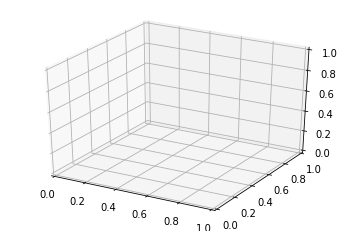

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

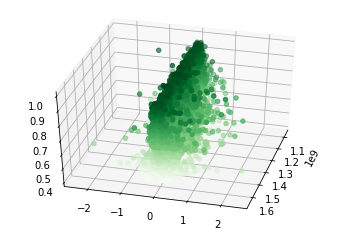

In [ ]:
ax = plt.axes(projection='3d')

zdata = x_lin.Value
xdata = x_lin.Timestamp
ydata = y_lin


ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.view_init(40, 15)

In [ ]:
xdata

36       0.0
37       0.0
38       0.0
39       1.0
40       0.0
        ... 
26420    1.0
26421    0.0
26422    1.0
26423    1.0
26424    1.0
Name: Returns, Length: 25501, dtype: float32

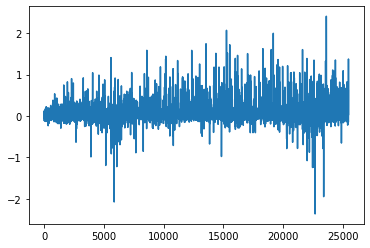

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ydata)

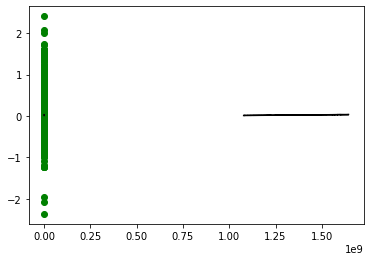

In [ ]:
plt.scatter(x_lin.Value, y_lin,color='g')
plt.plot(x_lin, model.predict(x_lin),color='k')

plt.show()

In [ ]:
len(y_lin)

25501

MAE: 0.06268616160260121
RMSE: 0.13569307129878436
Equation: y = -0.03 + -0.00x1 + 0.00x2


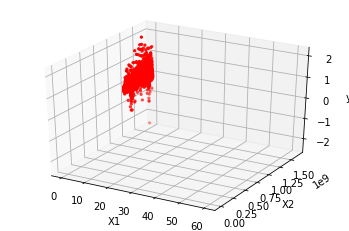

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train, X_test, y_train, y_test = train_test_split(x_lin, y_lin, test_size=0.3, random_state=42)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.Value, X_train.Timestamp, y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))
print(model.score(X_train, y))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()